## Phase 3.30
# Ensemble Methods
## Objectives
- Introduce the <a href='#backbone'>backbone of Ensemble methods.</a>
- Learn about <a href='#bagging'>Bagging</a> and <a href='#boosting'>Boosting</a> algorithms and some popular models.
- <a href='#coding'>Code</a> through an example!


<a id='backbone'></a>
# Introduction
*From the curriculum...*
- An *ensemble* refers to an algorithm that uses more than one model to make a prediction.

> **You are looking for investment advice. Instead of asking a single person, you ask three specialists.**
>   - **Stock Broker** who is correct 80% of the time.
>   - **Finance Professor** who is correct 65% of the time.
>   - **Investment Expert** who is correct 85% of the time.
>
> *If all three experts predict that a given investment is good, what are the odds that all three are wrong?*
> 
> . . .

In [1]:
# If all three experts predict that a given investment is good, 
# what is the probability that all three are wrong?
0.2 * .35 * 0.15

0.010499999999999999

<a id='bagging'></a>
# Bagging

*Bootstrap Aggregation*

<img src='./images/bagging.png' width='800'>

**Training a *bagging classifier*:**
- Split training data into a given number of *bags* (with replacement).
- Train a classifier on each subset of data.

**Predicting with a *bagging classifier*:**
- Each classifier makes a prediction.
- All predictions are aggregated into a single prediction.

---

## Random Forest
- A ***Random Forest*** is an ensemble algorithm which uses $n$-*Decision Trees* as its internal classifiers.
- Each *Decision Tree* is trained on **a subset of the data** (both rows *and* features).

### Pros and Cons
#### Pros
- Interpretability.
    - Accessible feature importances.
- Less data preprocessing required.
- Do not overfit (in theory).
- Good performance /accuracy.
- Robust to noise.

#### Cons
- Do not predict a continuous output (for regression).
- It does not predict beyond the range of the response values in the training data.

### Hyperparameters

- **n_estimators:**

    - It defines the number of decision trees to be created in a random forest.
    - Generally, a higher number makes the predictions stronger and more stable, but a very large number can result in higher training time.


- **criterion:**

    - It defines the function that is to be used for splitting.
    - The function measures the quality of a split for each feature and chooses the best split.


- **max_features :**

    - It defines the maximum number of features allowed for the split in each decision tree.
    - Increasing max features usually improve performance but a very high number can decrease the diversity of each tree.


- **max_depth:**

    - Random forest has multiple decision trees. This parameter defines the maximum depth of the trees.


- **min_samples_split:**

    - Used to define the minimum number of samples required in a leaf node before a split is attempted.
    - If the number of samples is less than the required number, the node is not split.


- **min_samples_leaf:** 

    - This defines the minimum number of samples required to be at a leaf node.
    - Smaller leaf size makes the model more prone to capturing noise in train data.


- **max_leaf_nodes:** 

    - This parameter specifies the maximum number of leaf nodes for each tree.
    - The tree stops splitting when the number of leaf nodes becomes equal to the max leaf node.

---
<a id='boosting'></a>
# Boosting

1. Train a single **weak learner**.
    - ***Weak Learner:*** *A simple model that does only slightly better than random guessing.*
    
    
2. Figure out **which examples** the weak learner got wrong.
- Build another weak learner that **focuses on the areas the first weak learner got wrong**.
- **Continue this process** until a predetermined stopping condition is met, such as until a set number of weak learners have been created, or the model's performance has plateaued.


- Boosting is most common in **AdaBoost** and **XGBoost** algorithms.
    - *Adaboost refits on misclassifications by adding class weights.*
    - *XGBoost refits on residuals. (See below)*

<img src='./images/new_gradient-boosting.png'>

- *The weak learners are trained sequentially on the **residuals** or **misclassifications** of the prior weak learner.*
- *Predictions are made where the predictions from each internal classifier are given a **weight of importance**.*

## AdaBoost
***Training on Misclassifications.***
> *From documentation:*
>
> *[AdaBoost] begins by fitting a classifier on the original dataset and then fits additional copies of the classifier on the same dataset but where the weights of incorrectly classified instances are adjusted such that subsequent classifiers focus more on difficult cases.*

### Pros and Cons
#### Pros
- Doesn't overfit easily.
- Few parameters to tune.

#### Cons
- Can be sensitive to outliers.

### Hyperparameters
- **base_estimators:** 
    - It helps to specify the type of base estimator, that is, the machine learning algorithm to be used as base learner.
    
- **n_estimators:**
    - It defines the number of base estimators.
    - The default value is 10, but you should keep a higher value to get better performance.
    
- **learning_rate:** 
    - This parameter controls the contribution of the estimators in the final combination.
    - There is a trade-off between learning_rate and n_estimators.
    
- **max_depth:**
    - Defines the maximum depth of the individual estimator.
    - Tune this parameter for best performance.

## XGBoost
> The boosting algorithm with the highest performance right now is **XGBoost**, which is short for eXtreme Gradient Boosting.
> 
> XGBoost is a stand-alone library that implements popular gradient boosting algorithms in the fastest, most performant way possible. There are many under-the-hood optimizations that allow XGBoost to train more quickly than any other library implementations of gradient boosting algorithms. 
> For instance, XGBoost is configured in such a way that it parallelizes the construction of trees across all your computer's CPU cores during the training phase. It also allows for more advanced use cases, such as distributing training across a cluster of computers, which is often a technique used to speed up computation. The algorithm even automatically handles missing values!

### Hyperparameters

- **nthread**:

    - Analogous to learning rate in GBM (*Gradient-Boosted Machine*).
    - Makes the model more robust by shrinking the weights on each step.

*This is used for parallel processing and the number of cores in the system should be entered..If you wish to run on all cores, do not input this value. The algorithm will detect it automatically.*


- **min_child_weight**:

    - Defines the minimum sum of weights of all observations required in a child.
    - Used to control over-fitting. Higher values prevent a model from learning relations which might be highly specific to the particular sample selected for a tree.


- **max_depth**:

    - It is used to define the maximum depth.
    - Higher depth will allow the model to learn relations very specific to a particular sample.


- **max_leaf_nodes**:

    - The maximum number of terminal nodes or leaves in a tree.
    - Can be defined in place of max_depth. Since binary trees are created, a depth of $n$ would produce a maximum of $2^{n}$ leaves.
    - If this is defined, GBM will ignore max_depth.


- **gamma**:

    - A node is split only when the resulting split gives a positive reduction in the loss function. Gamma specifies the minimum loss reduction required to make a split.
    - Makes the algorithm conservative. The values can vary depending on the loss function and should be tuned.


- **subsample**:

    - Same as the subsample of GBM. Denotes the fraction of observations to be randomly sampled for each tree.
    - Lower values make the algorithm more conservative and prevent overfitting but values that are too small might lead to under-fitting.


- **colsample_bytree**:

    - It is similar to max_features in GBM.
    - Denotes the fraction of columns to be randomly sampled for each tree.

<a id='coding'></a>
# Preparing Some Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# df = pd.read_csv('./data/winequality-red.csv', index_col=0)
df = sns.load_dataset('titanic')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [4]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.shape

(891, 15)

In [6]:
df.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [7]:
if 'deck' in df.columns:
    df.drop('deck', axis=1, inplace=True)

In [8]:
df.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
embark_town      2
alive            0
alone            0
dtype: int64

In [9]:
df[df['embark_town'].isna()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,NaN,yes,True
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,NaN,yes,True


In [10]:
df = df.drop(df[df['embark_town'].isna()].index)
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [11]:
df.drop(columns=['who', 'adult_male', 'alive'], inplace=True)
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,Southampton,False
1,1,1,female,38.0,1,0,71.2833,C,First,Cherbourg,False
2,1,3,female,26.0,0,0,7.9250,S,Third,Southampton,True
3,1,1,female,35.0,1,0,53.1000,S,First,Southampton,False
4,0,3,male,35.0,0,0,8.0500,S,Third,Southampton,True


In [12]:
df['alone'] = df['alone'].astype(int)
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,Southampton,0
1,1,1,female,38.0,1,0,71.2833,C,First,Cherbourg,0
2,1,3,female,26.0,0,0,7.9250,S,Third,Southampton,1
3,1,1,female,35.0,1,0,53.1000,S,First,Southampton,0
4,0,3,male,35.0,0,0,8.0500,S,Third,Southampton,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,Southampton,1
887,1,1,female,19.0,0,0,30.0000,S,First,Southampton,1
888,0,3,female,NaN,1,2,23.4500,S,Third,Southampton,0
889,1,1,male,26.0,0,0,30.0000,C,First,Cherbourg,1


In [13]:
df['survived'].value_counts(normalize=True)

0    0.617548
1    0.382452
Name: survived, dtype: float64

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

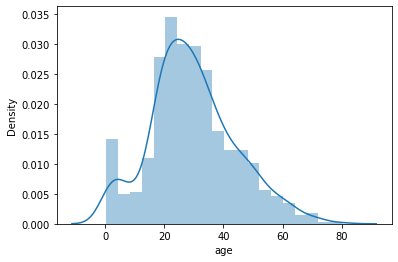

In [14]:
sns.distplot(df['age'])

In [15]:
df['age'].describe()

count    712.000000
mean      29.642093
std       14.492933
min        0.420000
25%       20.000000
50%       28.000000
75%       38.000000
max       80.000000
Name: age, dtype: float64

# Modeling

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [17]:
# X_train, X_test, y_train, y_test = train_test_split(
#     df.drop('quality', axis=1),
#     df['quality'],
#     stratify=df['quality'],
#     random_state=51
#     )
X_train, X_test, y_train, y_test = train_test_split(
    df.drop('survived', axis=1),
    df['survived'],
    stratify=df['survived'],
    random_state=51
    )
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((666, 10), (223, 10), (666,), (223,))

In [18]:
y_train.value_counts(normalize=True)

0    0.617117
1    0.382883
Name: survived, dtype: float64

In [19]:
y_test.value_counts(normalize=True)

0    0.618834
1    0.381166
Name: survived, dtype: float64

In [20]:
from sklearn.impute import SimpleImputer

In [21]:
X_train['age']

139    24.0
53     29.0
793     NaN
783     NaN
739     NaN
       ... 
317    54.0
517     NaN
159     NaN
709     NaN
407     3.0
Name: age, Length: 666, dtype: float64

In [22]:
X_train[['age']]

,age
139,24.0
53,29.0
793,NaN
783,NaN
739,NaN
...,...
317,54.0
517,NaN
159,NaN
709,NaN


In [23]:
cat_feats = X_train.select_dtypes('object').columns
num_feats = X_train.select_dtypes('number').columns

In [24]:
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)
X_train_processed = ohe.fit_transform(X_train[cat_feats])
X_test_processed = ohe.transform(X_test[cat_feats])

NameError: name 'OneHotEncoder' is not defined

In [ ]:
X_train_processed.shape, X_test_processed.shape

In [ ]:
X_train[num_feats]

In [ ]:
X_train_processed

In [ ]:
X_train_processed = pd.concat(
    [X_train[num_feats].reset_index(drop=True), 
     pd.DataFrame(X_train_processed).reset_index(drop=True)], 
    axis=1)
X_test_processed = pd.concat(
    [X_test[num_feats].reset_index(drop=True), 
     pd.DataFrame(X_test_processed).reset_index(drop=True)], 
    axis=1)

In [ ]:
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

In [ ]:
imp = SimpleImputer()
X_train_processed = imp.fit_transform(X_train_processed)
X_test_processed = imp.transform(X_test_processed)

In [ ]:
X_train_processed.shape, X_test_processed.shape

In [ ]:
forest = RandomForestClassifier(random_state=51)
forest.fit(X_train_processed, y_train)

In [ ]:
forest.feature_importances_

In [ ]:
fig, ax = plt.subplots()

ax.barh(width=forest.feature_importances_, 
        y=range(len(forest.feature_importances_)))
fig.tight_layout()

In [ ]:
# What I might do for a presentation...
with plt.style.context(['fivethirtyeight', 'seaborn-poster']):
    # Sorting and coloring.
    formatted_data = list(
        zip(forest.feature_importances_, 
            [x.title() for x in X_train.columns])
    )
    formatted_data.sort(key=lambda x: x[0])
    colors=['#7f7f7f' if x[0]<=0.1 else '#1f77b4' for x in formatted_data]
    
    # Plotting.
    fig, ax = plt.subplots(figsize=(8,6))
    ax.barh(
        width=[d[0] for d in formatted_data], 
        y=[d[1] for d in formatted_data],
        color=colors)
    ax.set(title='Random Forest: Feature Importance')
    fig.tight_layout()

In [ ]:
y_pred_test = forest.predict(X_test_processed)
y_pred_train = forest.predict(X_train_processed)

In [ ]:
print(classification_report(y_test, y_pred_test))

In [ ]:
xgb = XGBClassifier()
xgb.fit(X_train_processed, y_train)

In [ ]:
y_test_pred_xbg = xgb.predict(X_test_processed)

In [ ]:
print(classification_report(y_test, y_test_pred_xbg))

<a id='make-your-own'></a>
# Make-Your-Own Ensemble
## BaggingClassifier
- Uses the **Bagging** process with any classifier you choose!
    - https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html#sklearn.ensemble.BaggingClassifier
    
```python
>>> bagging = BaggingClassifier(
...     KNeighborsClassifier(), max_samples=0.5, max_features=0.5)
```

## VotingClassifier
- Uses voting / majority-rule for classifiers. 
    - https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html#sklearn.ensemble.VotingClassifier
    
```python
>>> clf1 = LogisticRegression()
>>> clf2 = RandomForestClassifier(n_estimators=50)
>>> clf3 = GaussianNB()

>>> eclf = VotingClassifier(
...     estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)])
```

## StackingClassifier
- Trains a **final estimator** on outputs of the given estimators.
    - https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingClassifier.html#sklearn.ensemble.StackingClassifier
    
```python
>>> clf1 = LogisticRegression()
>>> clf2 = RandomForestClassifier(n_estimators=50)
>>> clf3 = GaussianNB()
>>> clf_final = KNeighborsClassifier()

>>> reg = StackingClassifier(
...     estimators=[clf1, clf2, clf3],
...     final_estimator=clf_final)
```

# Scikit-Learn Ensembles Documentation 
- https://scikit-learn.org/stable/modules/ensemble.html